In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statistics_helper import StatisticsHelper

#Load the data
full_employee_data: pd.DataFrame = pd.read_csv('full_employee_data_cleaned.csv')

#Prepare the data
target_column = 'Attrition'
#Replace 'target_column' with the actual name of the target column
X = full_employee_data.drop(target_column, axis=1)
y = full_employee_data[target_column]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
#Test for the best n_neighbors value
for i in range(1,20):
    rf_model = KNeighborsClassifier(n_neighbors=i)
    rf_model.fit(X_train, y_train)

    #Make predictions
    y_pred = rf_model.predict(X_test)
    stats_helper = StatisticsHelper(X, y, rf_model, y_test, y_pred)
    print(f"N = {i}")
    stats_helper.show_accuracy()
    stats_helper.show_cross_val_score()
    stats_helper.show_roc_auc_score()

N = 1
---- Accuracy ----
Accuracy: 0.9965986394557823
------------------
--- Cross Validation Scores ---
Cross-validated scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0
-------------------------------
---- ROC AUC Score ----
ROC AUC Score: 0.9893617021276595
------------------------
N = 2
---- Accuracy ----
Accuracy: 0.9591836734693877
------------------
--- Cross Validation Scores ---
Cross-validated scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0
-------------------------------
---- ROC AUC Score ----
ROC AUC Score: 0.8723404255319149
------------------------
N = 3
---- Accuracy ----
Accuracy: 0.9467120181405896
------------------
--- Cross Validation Scores ---
Cross-validated scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0
-------------------------------
---- ROC AUC Score ----
ROC AUC Score: 0.8706606942889136
------------------------
N = 4
---- Accuracy ----
Accuracy: 0.8639455782312925
------------------
--- Cross Valid

It can be seen from the results above that N = 1,2,3 has the best results but is not reliable in a more varied dataset as it basically just picks the number next to it. N = 7 appears to reach a good result among the rest so that is that we will be using.

---- Accuracy ----
Accuracy: 0.8707482993197279
------------------
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       741
         1.0       0.68      0.37      0.48       141

    accuracy                           0.87       882
   macro avg       0.78      0.67      0.70       882
weighted avg       0.86      0.87      0.85       882

-------------------------------


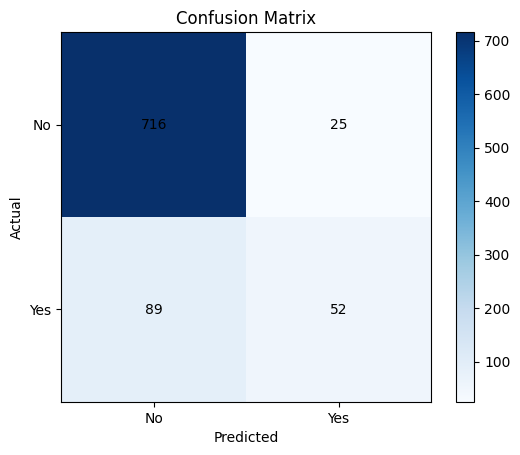

--- Cross Validation Scores ---
Cross-validated scores: [0.86961451 0.87641723 0.86281179 0.85941043 0.87528345]
Mean accuracy: 0.8687074829931973
Standard deviation: 0.006703739455371662
-------------------------------
---- ROC AUC Score ----
ROC AUC Score: 0.6675280673041032
------------------------


In [9]:
rf_model = KNeighborsClassifier(n_neighbors=7)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

stats_helper = StatisticsHelper(X, y, rf_model, y_test, y_pred)
stats_helper.show_accuracy()
stats_helper.show_classification_report()
stats_helper.show_confusion_matrix()
stats_helper.show_cross_val_score()
stats_helper.show_roc_auc_score()